<a href="https://colab.research.google.com/github/jayvyas91/Walmart-Confidence-Interval-and-CLT/blob/main/Walmart_Confidence_Interval_and_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import stats,norm,binom,poisson,expon,boxcox,geom,ttest_ind,ttest_1samp,ttest_rel

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
To: /content/walmart_data.csv?1641285094
100% 23.0M/23.0M [00:00<00:00, 87.6MB/s]


In [ ]:
df = pd.read_csv("walmart_data.csv?1641285094")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821


In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df['User_ID'].nunique()

5891

In [ ]:
df['Product_ID'].nunique()

3631

In [ ]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

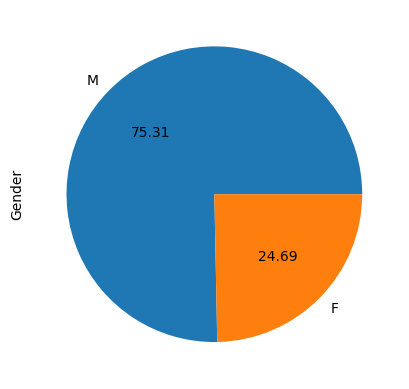

In [ ]:
df['Gender'].value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

In [ ]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

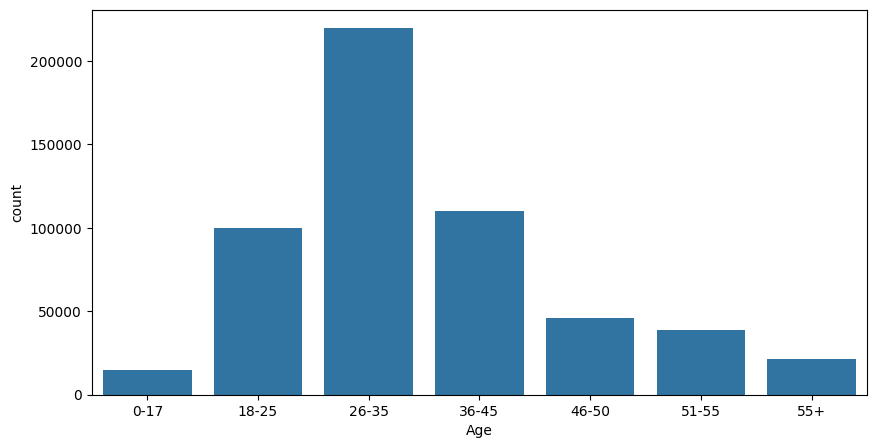

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(data = df, x = 'Age',order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55','55+'])
plt.show()

In [ ]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [ ]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Married' if x == 1 else 'Unmarried')
df['Marital_Status'].value_counts()

Unmarried    324731
Married      225337
Name: Marital_Status, dtype: int64

In [ ]:
df['Product_Category'].nunique()

20

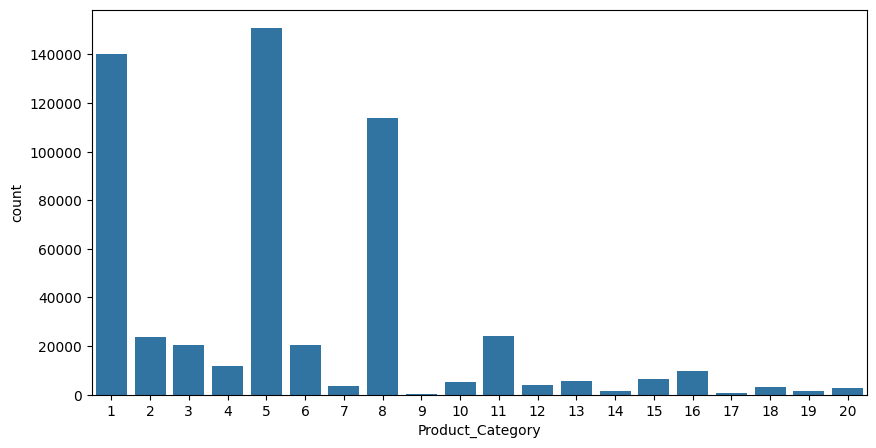

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(data = df, x = 'Product_Category')
plt.show()

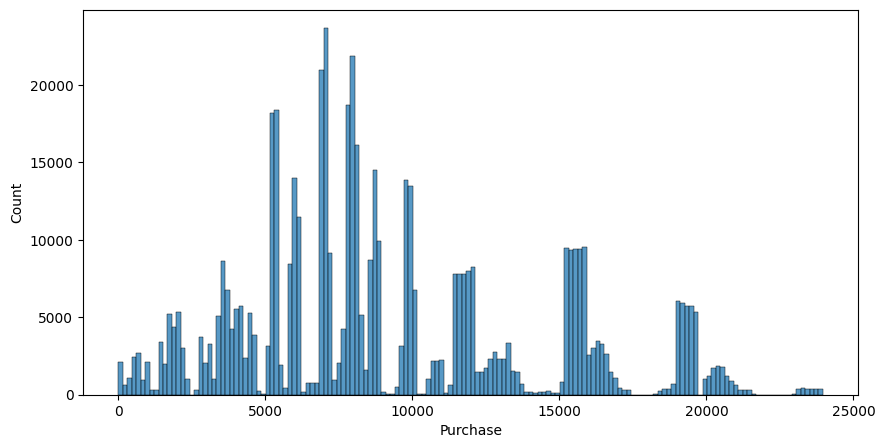

In [ ]:
plt.figure(figsize = (10, 5))
sns.histplot(x = 'Purchase', data = df)
plt.show()

The dataset provides information on the following variables:
- User_ID: It contains unique identification numbers assigned to each user.
- The dataset includes a total of 550,068 user records.
- Occupation: This variable represents the occupation of the users. The dataset includes values ranging from 0 to 20, indicating different occupations.
- Product_Category: It indicates the category of the products purchased by the users.The dataset includes values ranging from 1 to 20, representing different product categories.
- Purchase: This variable represents the purchase amount made by each user. The dataset includes purchase values ranging from 12 to 23,961.

In [ ]:
df.describe()

,User_ID,Occupation,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,5.404270,9263.968713
std,1.727592e+03,6.522660,3.936211,5023.065394
min,1.000001e+06,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,20.000000,23961.000000


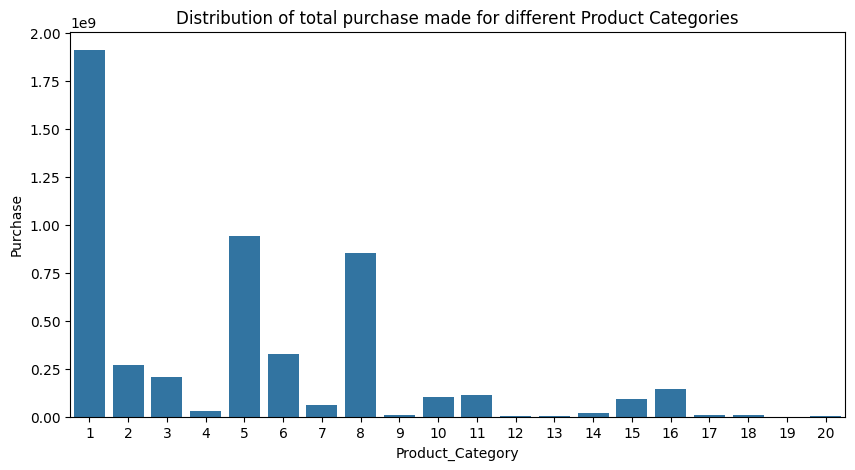

In [ ]:
df_product_category = df.groupby(by = 'Product_Category')['Purchase'].sum().to_frame().reset_index()
plt.figure(figsize = (10, 5))
plt.title('Distribution of total purchase made for different Product Categories')
sns.barplot(data = df_product_category, x = 'Product_Category', y = 'Purchase')
plt.show()

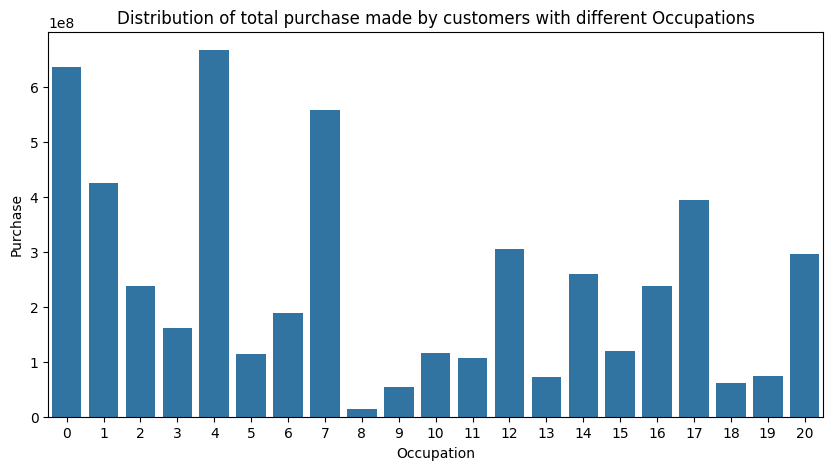

In [ ]:
df_occupation = df.groupby(by = 'Occupation')['Purchase'].sum().to_frame().reset_index()
plt.figure(figsize = (10, 5))
plt.title('Distribution of total purchase made by customers with different Occupations')
sns.barplot(data = df_occupation, x = 'Occupation', y = 'Purchase')
plt.show()

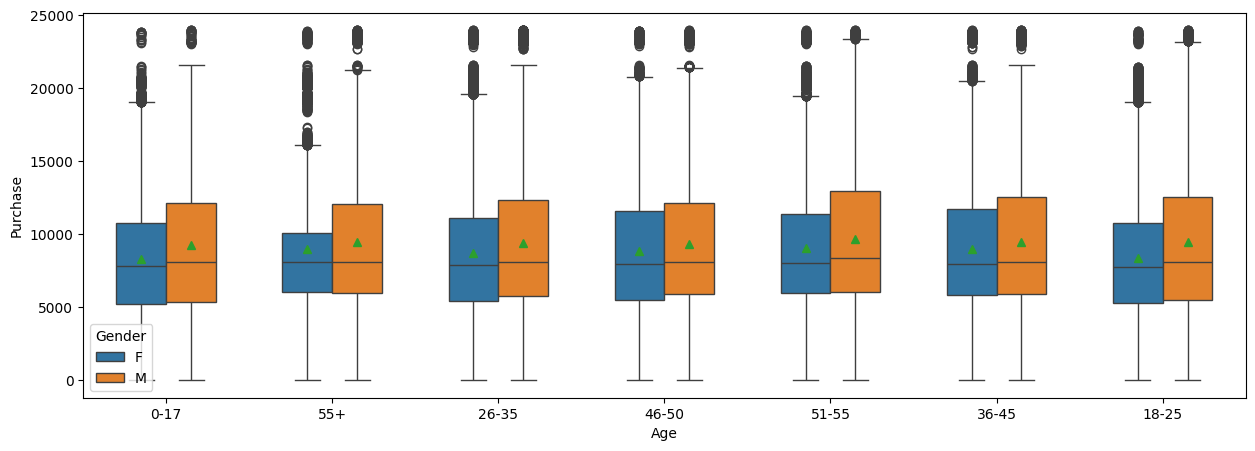

In [ ]:
plt.figure(figsize = (15, 5))
sns.boxplot(data = df, x = 'Age', y = 'Purchase', hue = 'Gender', showmeans = True, width = 0.6)
plt.show()

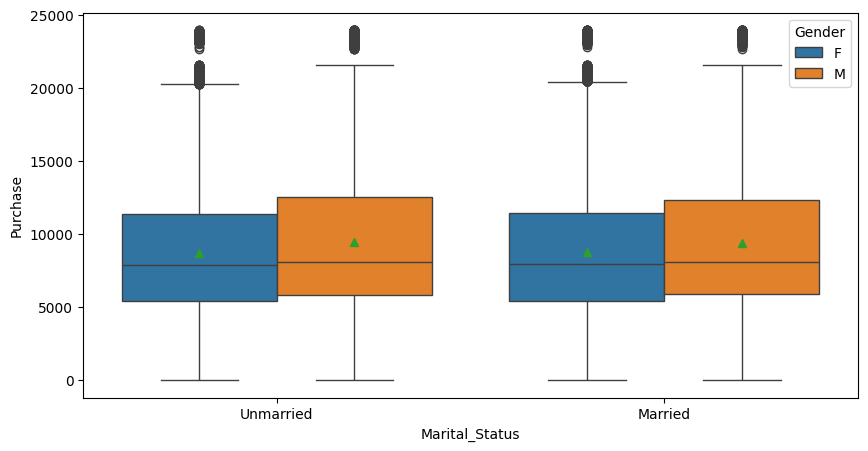

In [ ]:
plt.figure(figsize = (10, 5))
sns.boxplot(data = df, x = 'Marital_Status', y = 'Purchase', hue = 'Gender', showmeans = True)
plt.show()

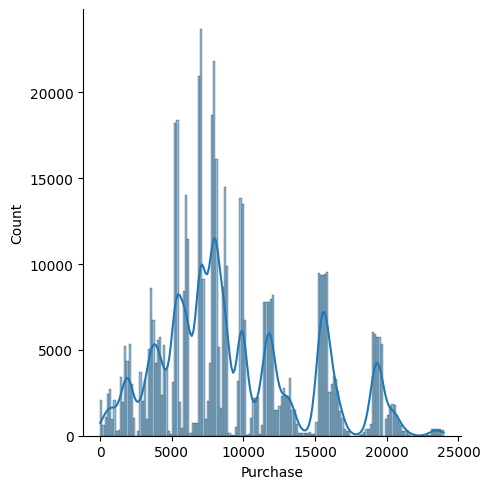

In [ ]:
sns.displot(x = 'Purchase', data = df, kde = True)
plt.show()

In [ ]:
male_avg_purchase = df[df['Gender'] == 'M']['Purchase'].mean()
female_avg_purchase = df[df['Gender'] == 'F']['Purchase'].mean()

male_avg_purchase, female_avg_purchase

(9437.526040472265, 8734.565765155476)

In [ ]:
# Insights : The average amount spent per transaction for female customers is approximately $8734.57, while the average amount spent per transaction for male customers is approximately $9437.53.
# From these results, we can conclude that on average, male customers tend to spend more per transaction compared to female customers.
# But it is not correct way to conclude the solution

In [ ]:
male_avg_purchase = df[df['Gender'] == 'M']['Purchase']
female_avg_purchase = df[df['Gender'] == 'F']['Purchase']

male_avg_purchase_sample = [np.mean(male_avg_purchase.sample(5000)) for i in range(1000)]
female_avg_purchase_sample = [np.mean(female_avg_purchase.sample(5000)) for i in range(1000)]

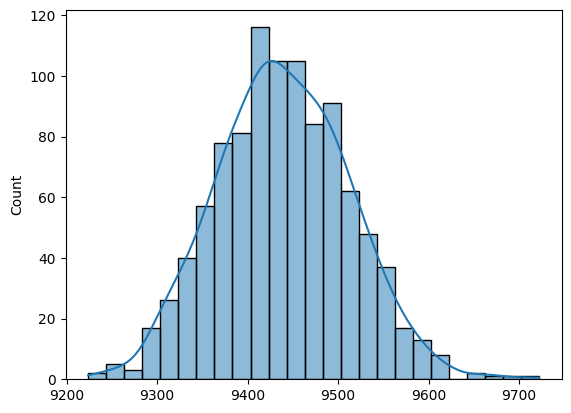

In [ ]:
sns.histplot(x = male_avg_purchase_sample, kde = True)
plt.show()

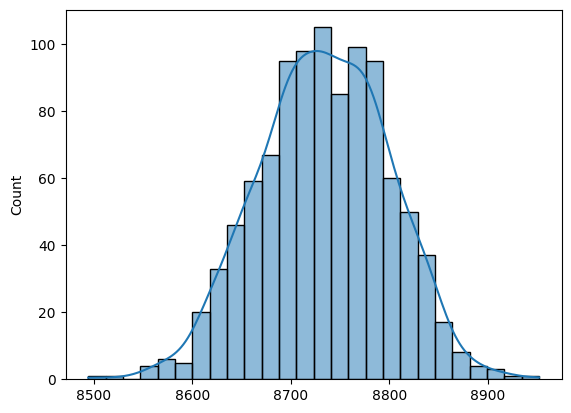

In [ ]:
sns.histplot(x = female_avg_purchase_sample, kde = True)
plt.show()

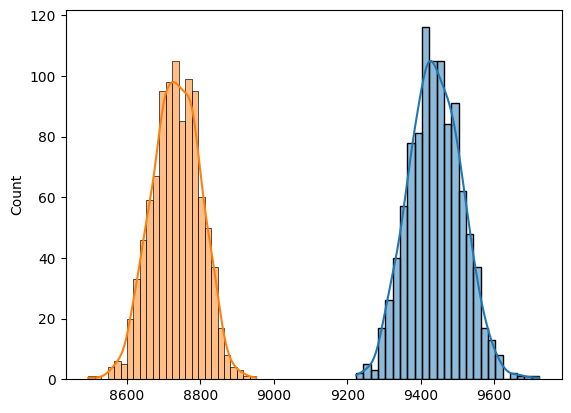

In [ ]:
sns.histplot(x = male_avg_purchase_sample, kde = True)
sns.histplot(x = female_avg_purchase_sample, kde = True)
plt.show()

In [ ]:
male_purchase_avearge = np.mean(male_avg_purchase_sample)
SE_male = male_avg_purchase.std()/np.sqrt(5000)
Confidence_Interval = [male_purchase_avearge - 1.96 * SE_male , male_purchase_avearge + 1.96 * SE_male ]
Confidence_Interval

[9298.065571920053, 9580.361972879944]

In [ ]:
female_purchase_avearge = np.mean(female_avg_purchase_sample)
SE_female = female_avg_purchase.std()/np.sqrt(5000)
Confidence_Interval = [female_purchase_avearge - 1.96 * SE_female , female_purchase_avearge + 1.96 * SE_female ]
Confidence_Interval

[8601.371849934838, 8865.653780065166]

### Insights :
 - 95% of the times, the sample purchase amount average for the males happen to be between 9298 to 9580
 - 95% of the times, the sample purchase amount average for the females happen to be between 8601 to 8865

From these results, we can conclude that on average purchase amount for males is gretaer than average purchase amount for females.

In [ ]:
Married_avg_purchase = df[df['Marital_Status'] == 'Married']['Purchase'].mean()
Unmarried_avg_purchase = df[df['Marital_Status'] == 'Unmarried']['Purchase'].mean()

Married_avg_purchase, Unmarried_avg_purchase

(9261.174574082374, 9265.907618921507)

In [ ]:
Married_avg_purchase = df[df['Marital_Status'] == 'Married']['Purchase']
Unmarried_avg_purchase = df[df['Marital_Status'] == 'Unmarried']['Purchase']

Married_avg_purchase_sample = [np.mean(Married_avg_purchase.sample(5000)) for i in range(1000)]
Unmarried_avg_purchase_sample = [np.mean(Unmarried_avg_purchase.sample(5000)) for i in range(1000)]

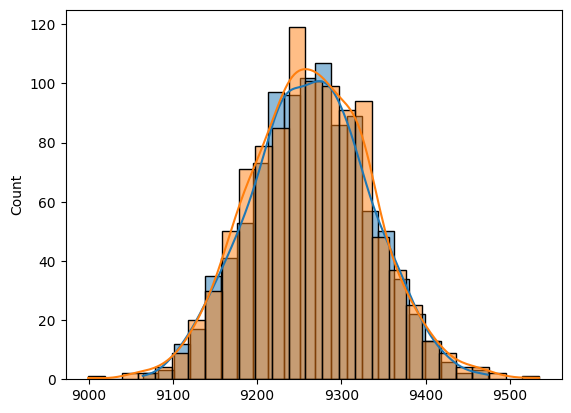

In [ ]:
sns.histplot(x = Married_avg_purchase_sample, kde = True)
sns.histplot(x = Unmarried_avg_purchase_sample, kde = True)
plt.show()

In [ ]:
Married_purchase_avearge = np.mean(Married_avg_purchase_sample)
SE_Married = Married_avg_purchase.std()/np.sqrt(5000)
Confidence_Interval = [Married_purchase_avearge - 1.96 * SE_Married  , Married_purchase_avearge + 1.96 * SE_Married ]
Confidence_Interval

[9124.421766670903, 9402.544367729095]

In [ ]:
Unmarried_purchase_avearge = np.mean(Unmarried_avg_purchase_sample)
SE_Unmarried = Unmarried_avg_purchase.std()/np.sqrt(5000)
Confidence_Interval = [Unmarried_purchase_avearge - 1.96 * SE_Unmarried  , Unmarried_purchase_avearge + 1.96 * SE_Unmarried ]
Confidence_Interval

[9124.317164719709, 9403.019110880294]

Insights :
- 95% of the times, the sample purchase amount average for the married customers happen to be between 9124 to 9402
- 95% of the times, the sample purchase amount average for the unmarried customers happen to be between 9124 to 9403

From these results, we can conclude that on average purchase amount for married and unmarried more or less equal.

Recommendations
 - Since the average total purchase made by males is greater than females, Walmart should give special attention to their choices of products so as to retain them.